## House Price Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from scipy import stats
import pylab

In [2]:
df = pd.read_csv("C:/Users/Vaidhehi/kc_house_data.csv")

In [3]:
df.shape

(21613, 21)

In [4]:
df.iloc[:5,1:10]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20141013T000000  221900.0         3       1.00         1180      5650   
1  20141209T000000  538000.0         3       2.25         2570      7242   
2  20150225T000000  180000.0         2       1.00          770     10000   
3  20141209T000000  604000.0         4       3.00         1960      5000   
4  20150218T000000  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  
0     1.0           0     0  
1     2.0           0     0  
2     1.0           0     0  
3     1.0           0     0  
4     1.0           0     0

In [5]:
df.iloc[:5,10:]

condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
distinct_counts = []

for column in df.columns:
    distinct_count = df[column].nunique()  
    first_5_unique_values = df[column].unique()[:5]  
    last_5_unique_values = df[column].unique()[-5:]  
    distinct_counts.append({
        'Column': column, 
        'Distinct_Values_Count': distinct_count, 
        'First_5_Unique_Values': first_5_unique_values,
        'Last_5_Unique_Values': last_5_unique_values
    })

distinct_counts_df = pd.DataFrame(distinct_counts)

distinct_counts_df.sort_values(by='Distinct_Values_Count', ascending=False,ignore_index=True)

Column  Distinct_Values_Count  \
0              id                  21436   
1        sqft_lot                   9782   
2      sqft_lot15                   8689   
3             lat                   5034   
4           price                   4028   
5     sqft_living                   1038   
6      sqft_above                    946   
7   sqft_living15                    777   
8            long                    752   
9            date                    372   
10  sqft_basement                    306   
11       yr_built                    116   
12   yr_renovated                     70   
13        zipcode                     70   
14      bathrooms                     30   
15       bedrooms                     13   
16          grade                     12   
17         floors                      6   
18           view                      5   
19      condition                      5   
20     waterfront                      2   

                                First_5_Unique_Values  \
0   [7129300520, 6414100192, 5631500400, 248720087...   
1                     [5650, 7242, 10000, 5000, 8080]   
2                      [5650, 7639, 8062, 5000, 7503]   
3        [47.5112, 47.721, 47.7379, 47.5208, 47.6168]   
4   [221900.0, 538000.0, 180000.0, 604000.0, 51000...   
5                       [1180, 2570, 770, 1960, 1680]   
6                       [1180, 2170, 770, 1050, 1680]   
7                      [1340, 1690, 2720, 1360, 1800]   
8   [-122.257, -122.319, -122.233, -122.393, -122....   
9   [20141013T000000, 20141209T000000, 20150225T00...   
10                           [0, 400, 910, 1530, 730]   
11                     [1955, 1951, 1933, 1965, 1987]   
12                        [0, 1991, 2002, 2010, 1999]   
13                [98178, 98125, 98028, 98136, 98074]   
14                         [1.0, 2.25, 3.0, 2.0, 4.5]   
15                                    [3, 2, 4, 5, 1]   
16                                   [7, 6, 8, 11, 9]   
17                          [1.0, 2.0, 1.5, 3.0, 2.5]   
18                                    [0, 3, 4, 2, 1]   
19                                    [3, 5, 4, 1, 2]   
20                                             [0, 1]   

                                 Last_5_Unique_Values  
0   [263000018, 6600060120, 1523300141, 291310100,...  
1                      [5536, 1126, 5813, 2388, 1076]  
2                     [6814, 11303, 5731, 1509, 2007]  
3       [47.4304, 47.2815, 47.3906, 47.3339, 47.6502]  
4   [541800.0, 1537000.0, 610685.0, 1007500.0, 402...  
5                      [1333, 2198, 3087, 3118, 1425]  
6                      [1333, 2198, 3087, 3118, 1425]  
7                      [2604, 1268, 2198, 3038, 2927]  
8   [-121.405, -122.486, -121.795, -121.734, -121....  
9   [20141011T000000, 20150201T000000, 20141130T00...  
10                          [508, 2810, 20, 274, 248]  
11                     [1934, 1938, 1919, 1906, 1935]  
12                     [1960, 1967, 1965, 1934, 1944]  
13                [98072, 98188, 98014, 98055, 98039]  
14                        [8.0, 7.5, 7.75, 6.25, 6.5]  
15                                 [8, 9, 11, 10, 33]  
16                                  [12, 4, 3, 13, 1]  
17                          [2.0, 1.5, 3.0, 2.5, 3.5]  
18                                    [0, 3, 4, 2, 1]  
19                                    [3, 5, 4, 1, 2]  
20                                             [0, 1]

In [10]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [11]:
df.drop(['id','date'],axis=1,inplace=True)

In [12]:
numeric_columns = ['sqft_lot','sqft_lot15','sqft_living','sqft_living15','sqft_above','sqft_basement','lat','long','yr_built','yr_renovated']
categorical_columns = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode']

In [13]:
def num_combined_plot(data, x, y):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.histplot(data=data, x=x, kde=True, ax=axes[0], color='coral')
    
    sns.regplot(data=data, x=x, y=y, ax=axes[1], color='teal', 
                scatter_kws={'edgecolor': 'white'}, line_kws={"color": "coral"})

    corr_coeff = data[[x, y]].corr().iloc[0, 1]
    axes[1].annotate(f'Correlation : {corr_coeff:.2f}', xy=(0.65, 0.9), xycoords='axes fraction', fontsize=14, color='coral')
    sns.despine(bottom=True, left=True)
    axes[0].set(xlabel=f'{x}', ylabel='Frequency', title=f'{x} Distribution')
    axes[1].set(xlabel=f'{x}', ylabel=f'{y}', title=f'{x} vs {y}')
    axes[1].yaxis.set_label_position("right")
    axes[1].yaxis.tick_right()

    plt.show()

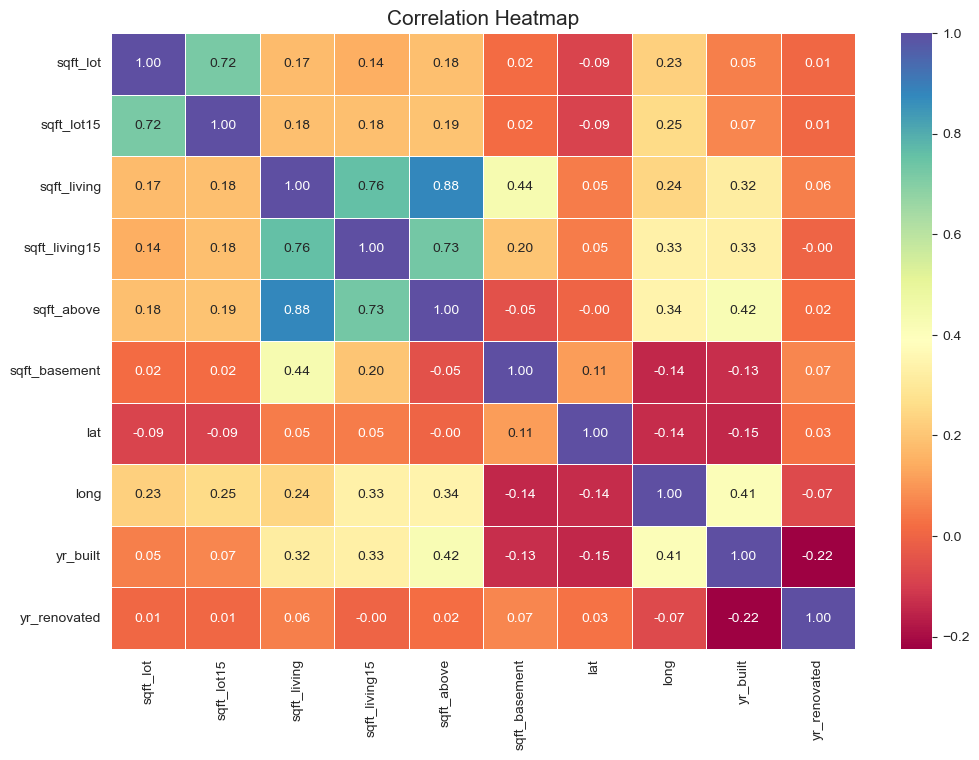

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='Spectral', linewidths=0.5,fmt=".2f")
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

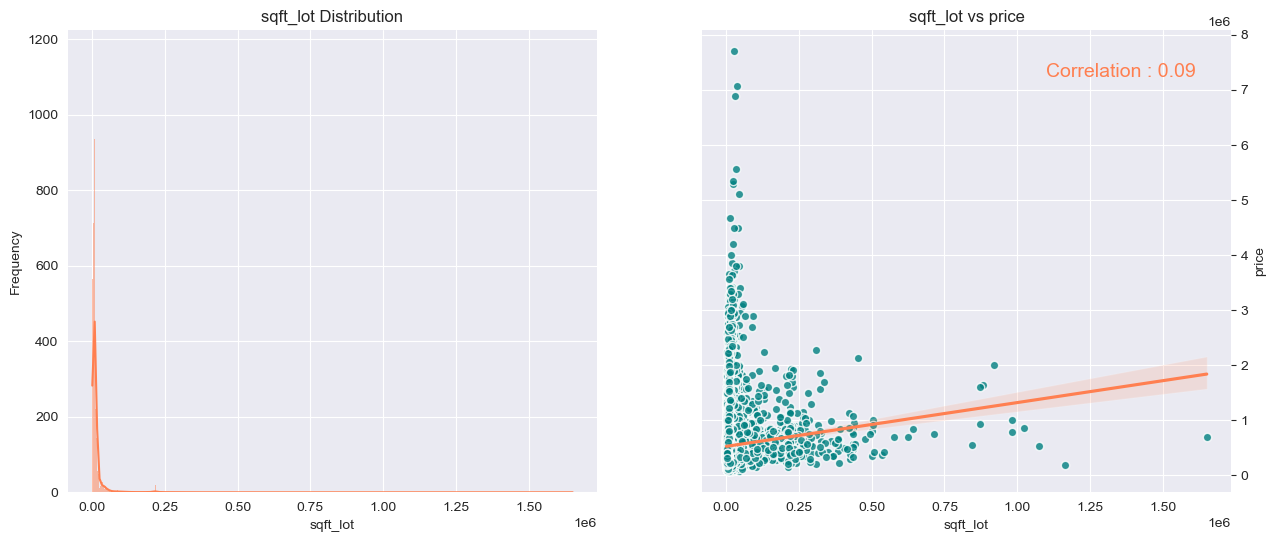

In [15]:
num_combined_plot(df,'sqft_lot','price')

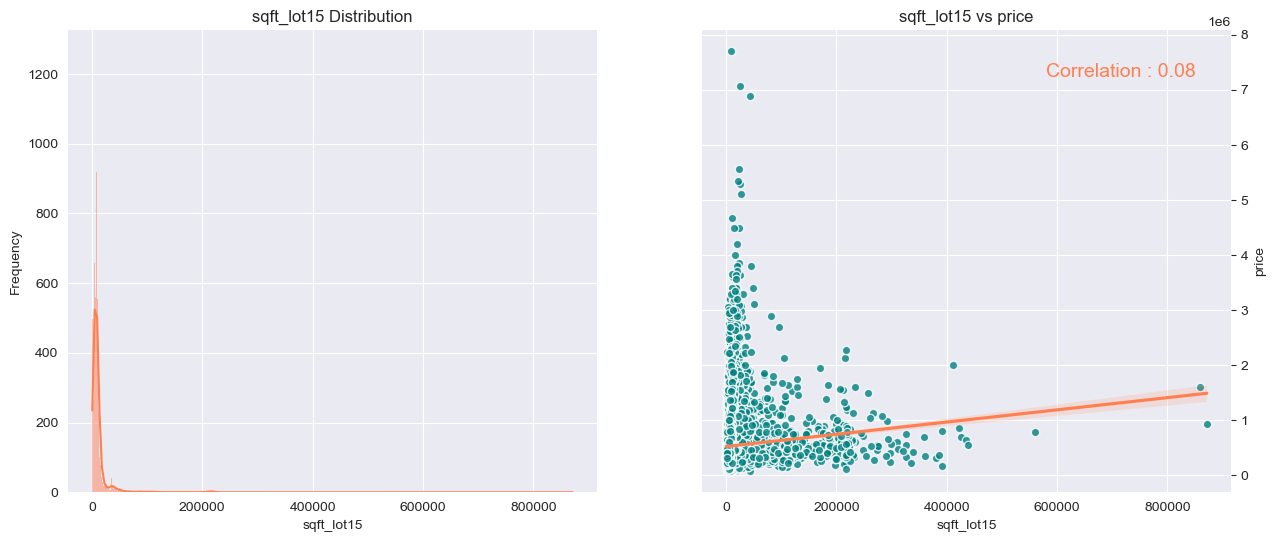

In [16]:
num_combined_plot(df,'sqft_lot15','price')

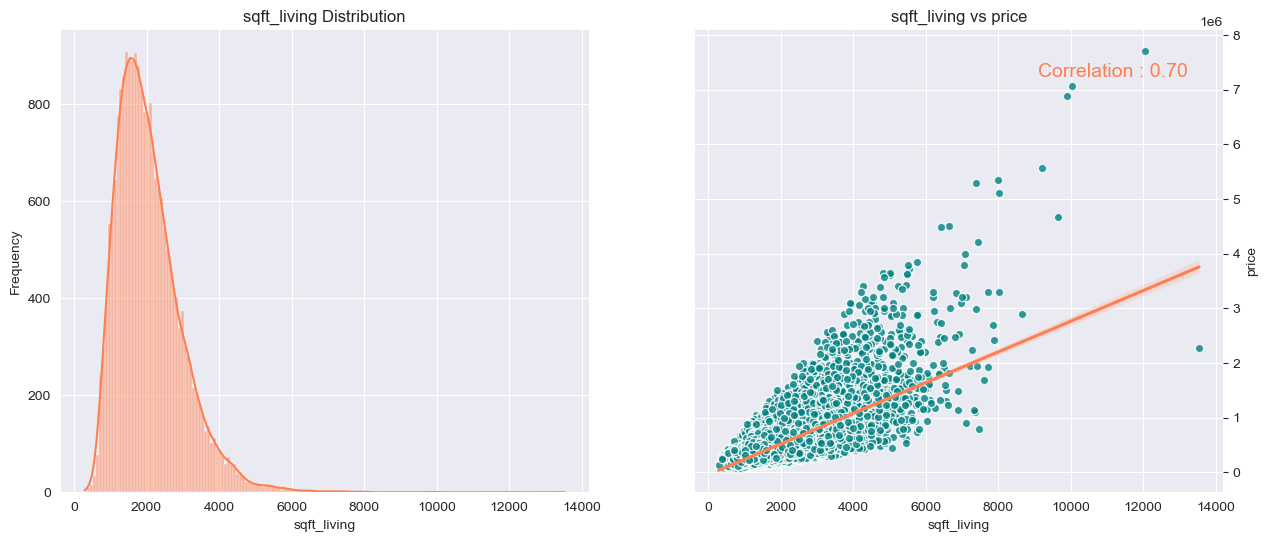

In [17]:
num_combined_plot(df,'sqft_living','price')

In [18]:
num_combined_plot(df,'sqft_living15','price')

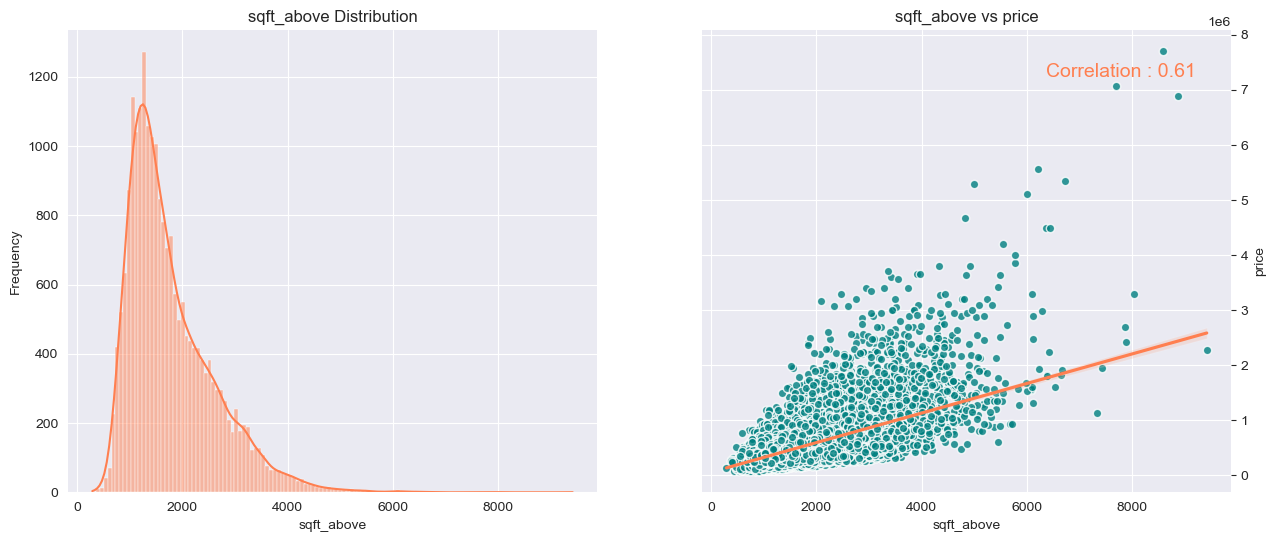

In [19]:
num_combined_plot(df,'sqft_above','price')

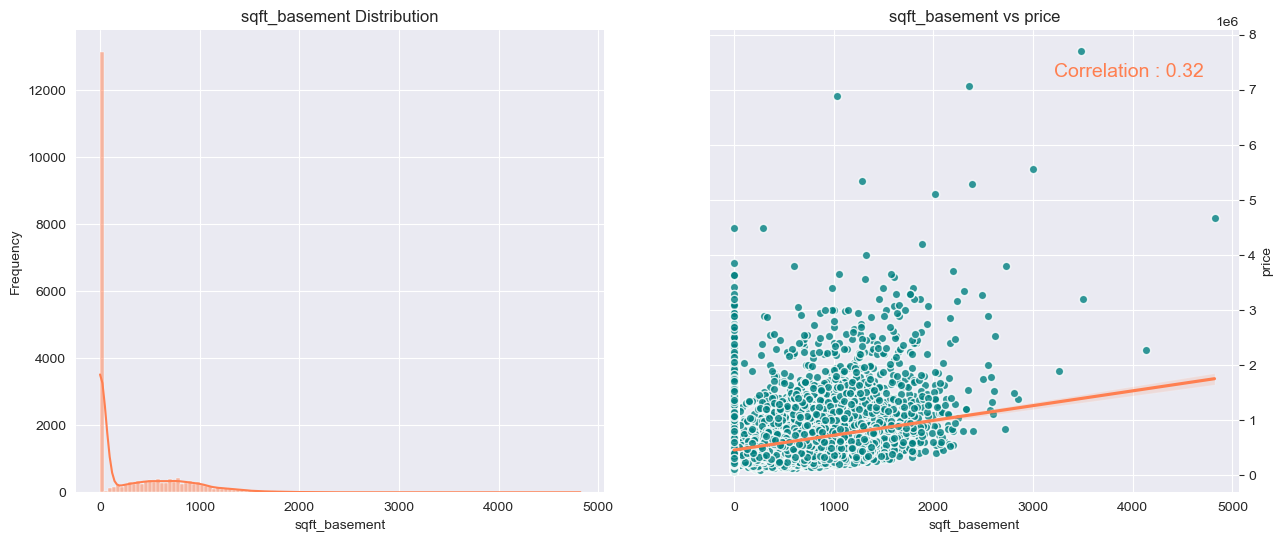

In [20]:
num_combined_plot(df,'sqft_basement','price')

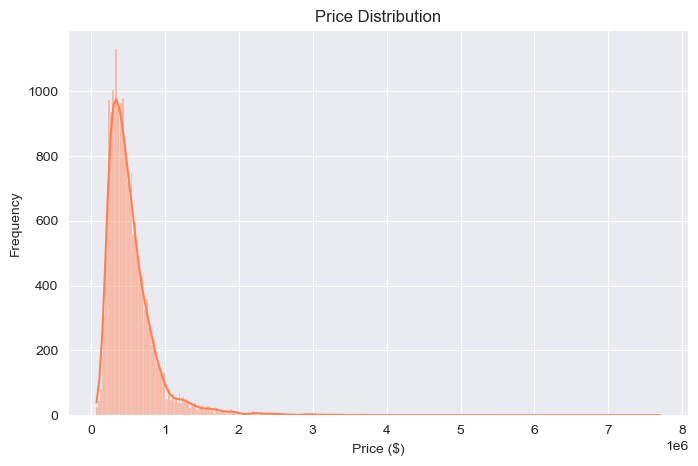

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='price', kde=True, color='coral')
plt.xlabel('Price ($)')
plt.ylabel('Frequency') 
plt.title('Price Distribution')
plt.show()

In [28]:
def create_subplot_grid(data, x, y):
    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot the countplot with percentages
    sns.countplot(data=data, x=x, ax=axes[0], palette='Set2')
    axes[0].set(title=f'{x} Frequency')
    axes[0].tick_params(axis='x', rotation=90)
    axes[0].set_ylabel('Count (%)')
    
    # Calculate and annotate the percentages
    total = len(data)
    for p in axes[0].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x_ = p.get_x() + p.get_width() / 2
        y_ = p.get_height()
        axes[0].annotate(percentage, (x_, y_), ha='center', va='bottom')
    sns.boxplot(data=data, x=x, y=y, ax=axes[1], palette='Set2')
    axes[1].set(title=f'Price vs. {x}')
    axes[1].tick_params(axis='x', rotation=90)

    # Plot the scatterplot with colors based on x
    sns.scatterplot(data=data, x=x, y=y, ax=axes[2], hue=x, palette='Set2')
    axes[2].set(title=f'{y} vs. {x}')
    axes[2].tick_params(axis='x', rotation=90)
    axes[2].yaxis.set_label_position("right")
    
    # Add the regression line to the scatterplot
    sns.regplot(data=data, x=x, y=y, ax=axes[2], color='coral', scatter=False)
    axes[2].get_legend().remove()

    plt.tight_layout()
    plt.show()

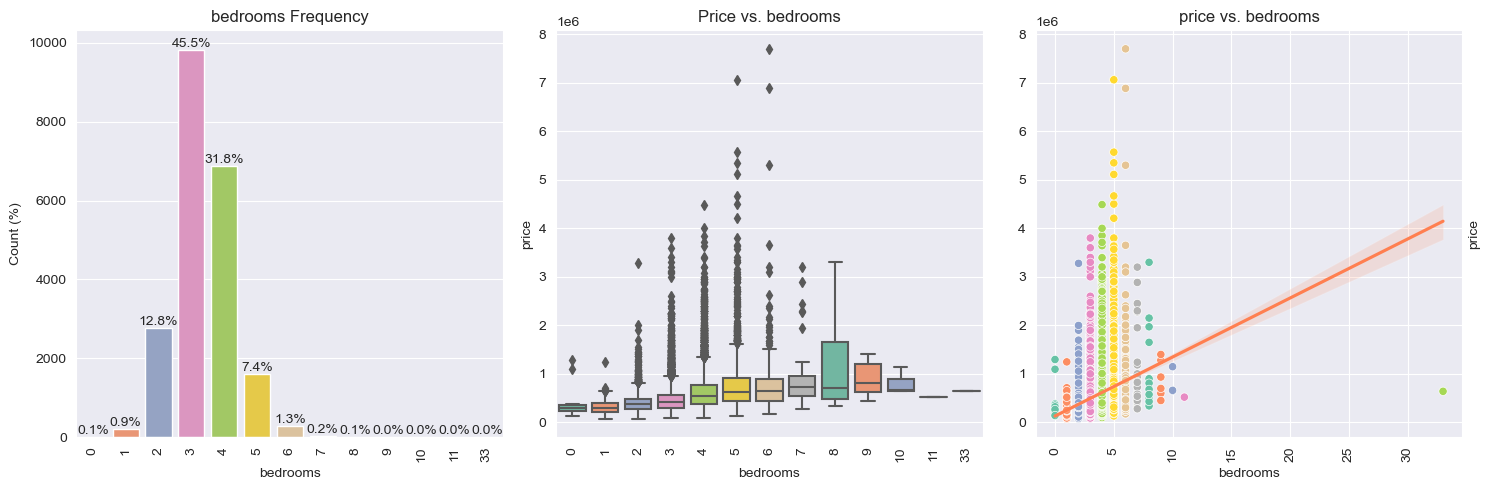

In [29]:
create_subplot_grid(df, 'bedrooms', 'price')

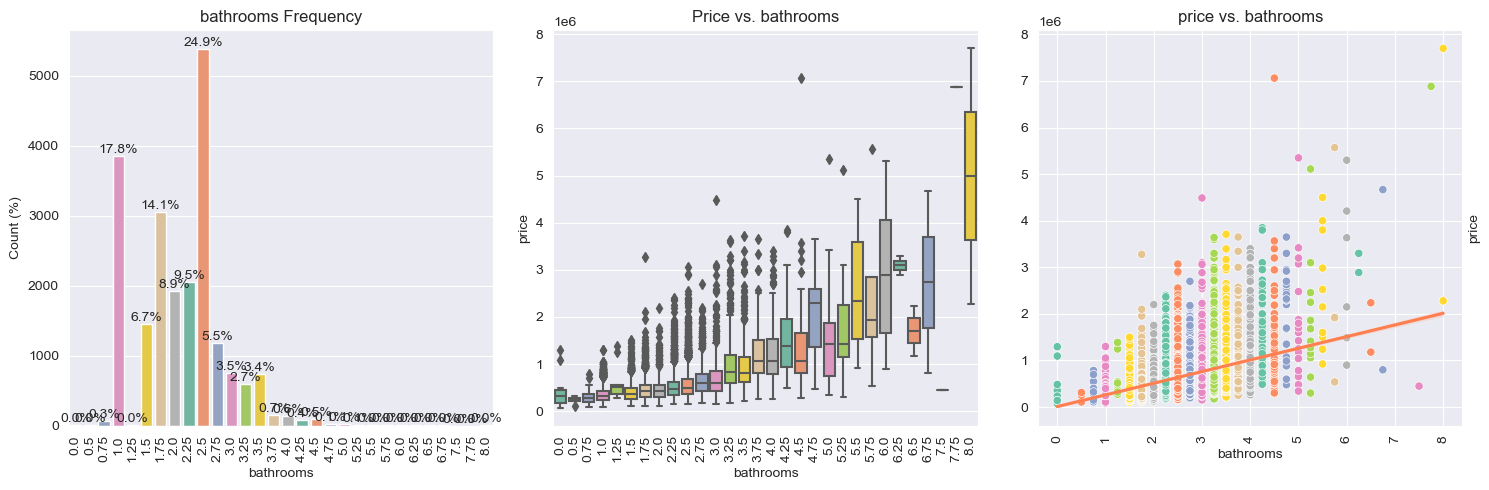

In [30]:
create_subplot_grid(df, 'bathrooms', 'price')

In [31]:
create_subplot_grid(df, 'floors', 'price')

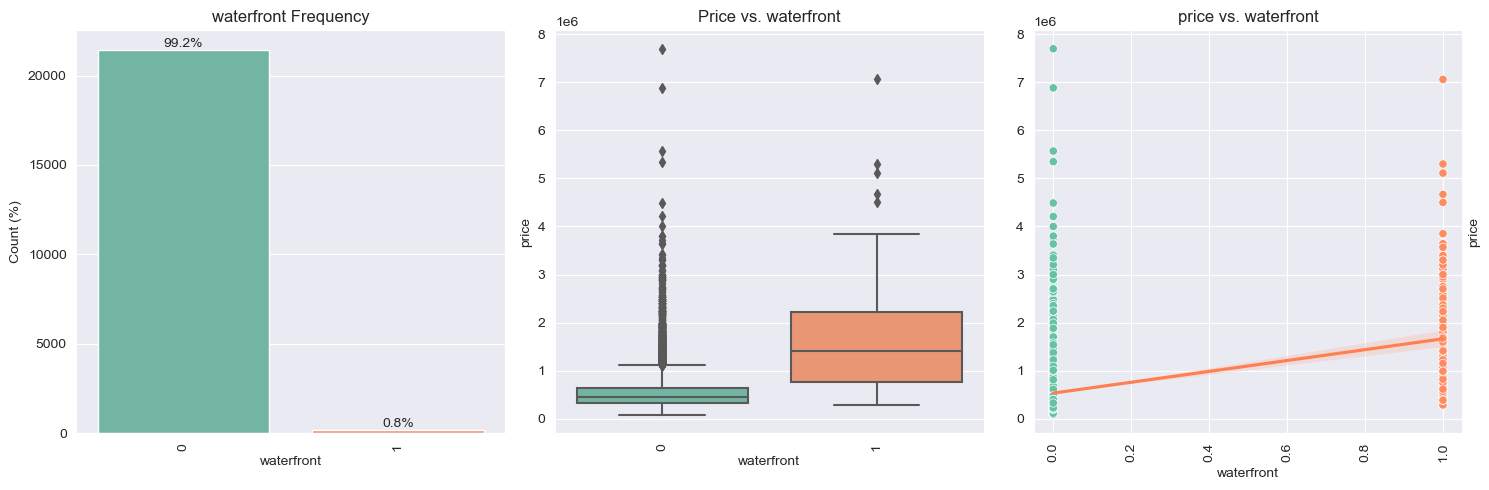

In [32]:
create_subplot_grid(df, 'waterfront', 'price')

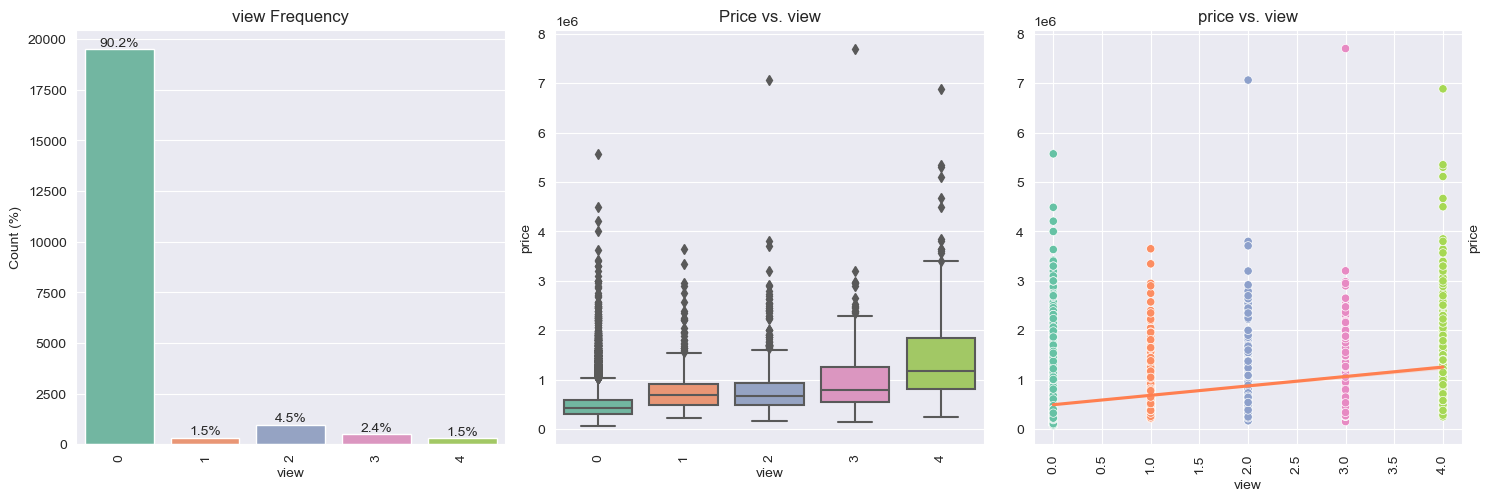

In [33]:
create_subplot_grid(df, 'view', 'price')

In [34]:
create_subplot_grid(df, 'condition', 'price')

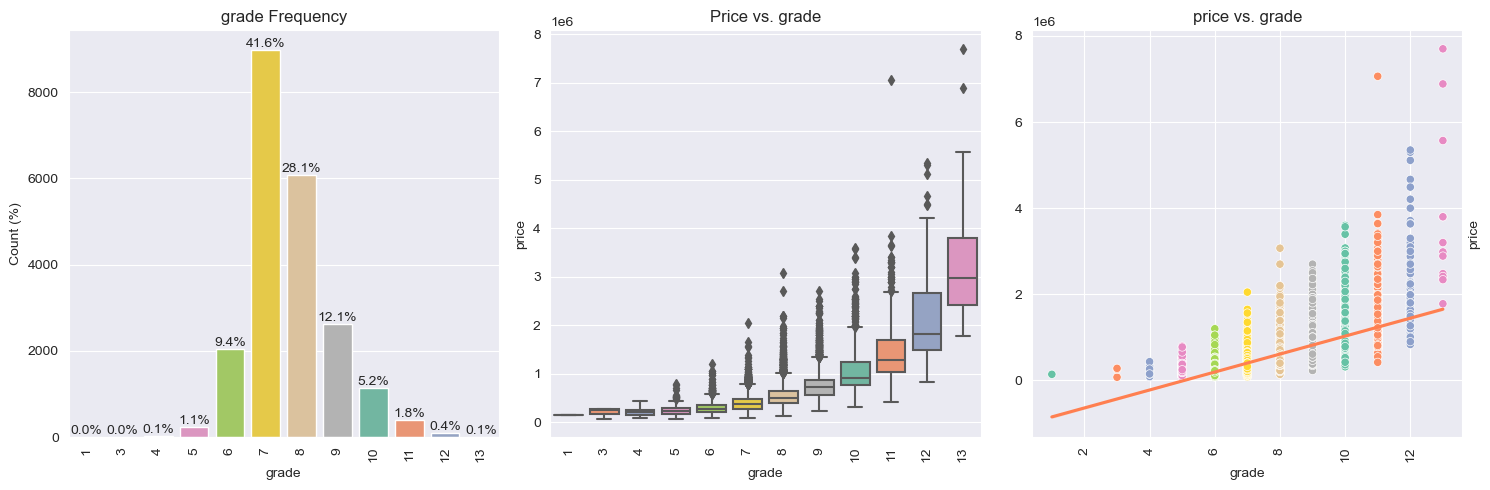

In [35]:
create_subplot_grid(df, 'grade', 'price')

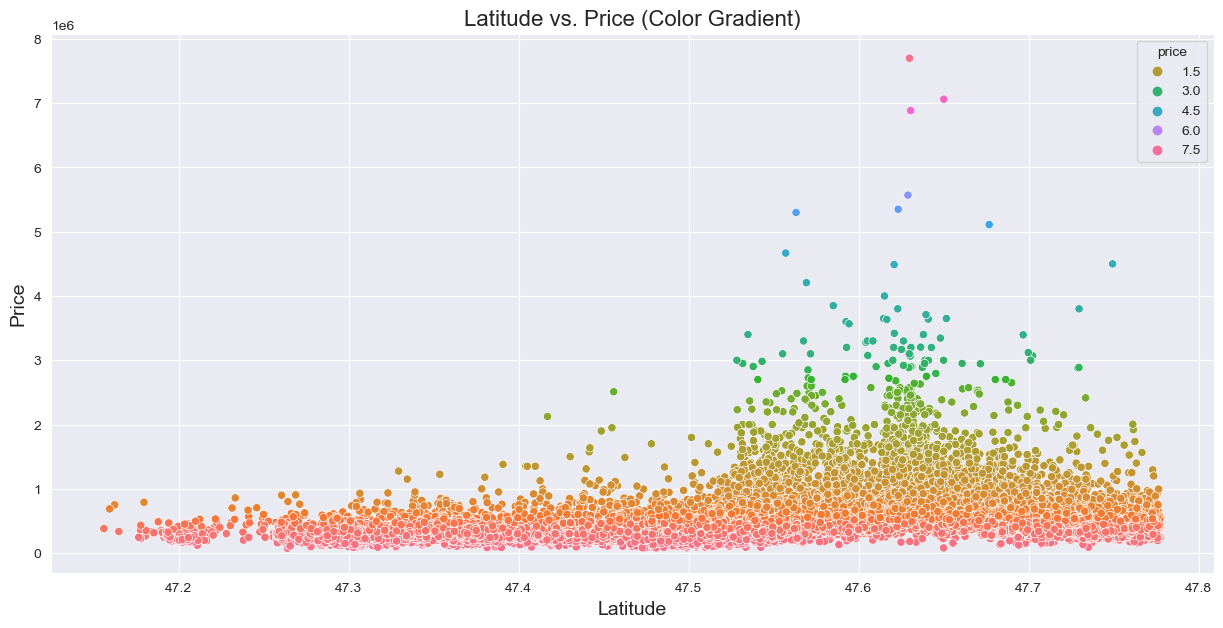

In [36]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='lat', y='price', data=df, hue='price', palette='husl')
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Latitude vs. Price (Color Gradient)', fontsize=16)
plt.show()


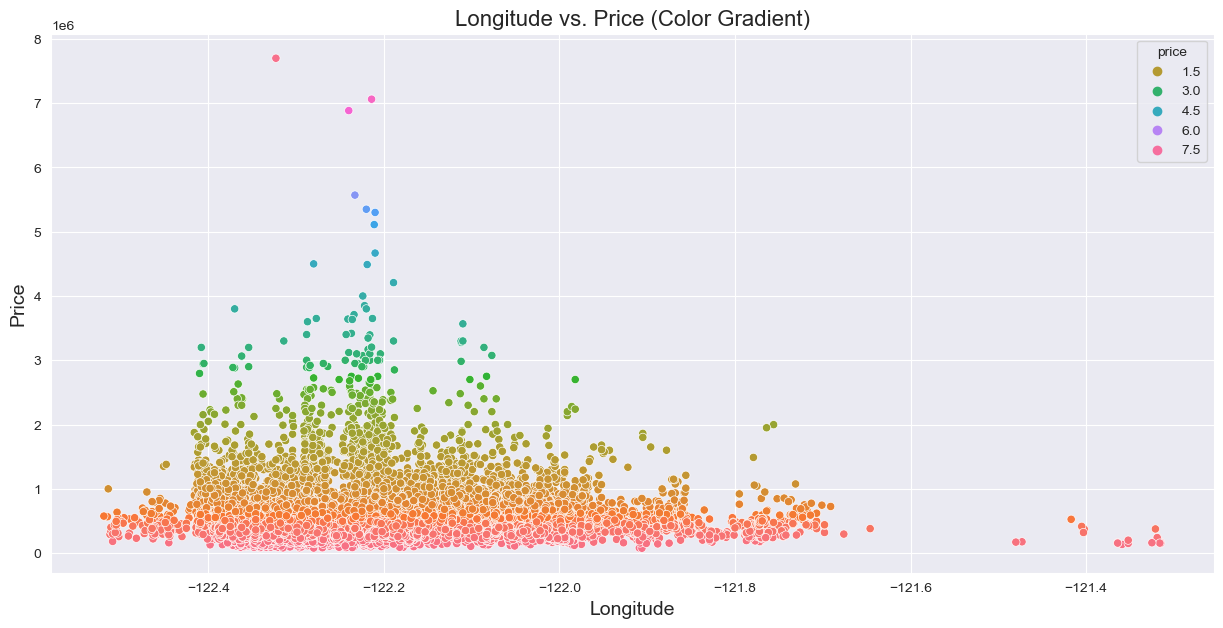

In [37]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='long', y='price', data=df, hue='price', palette='husl')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Longitude vs. Price (Color Gradient)', fontsize=16)
plt.show()

Text(0, 0.5, 'price')

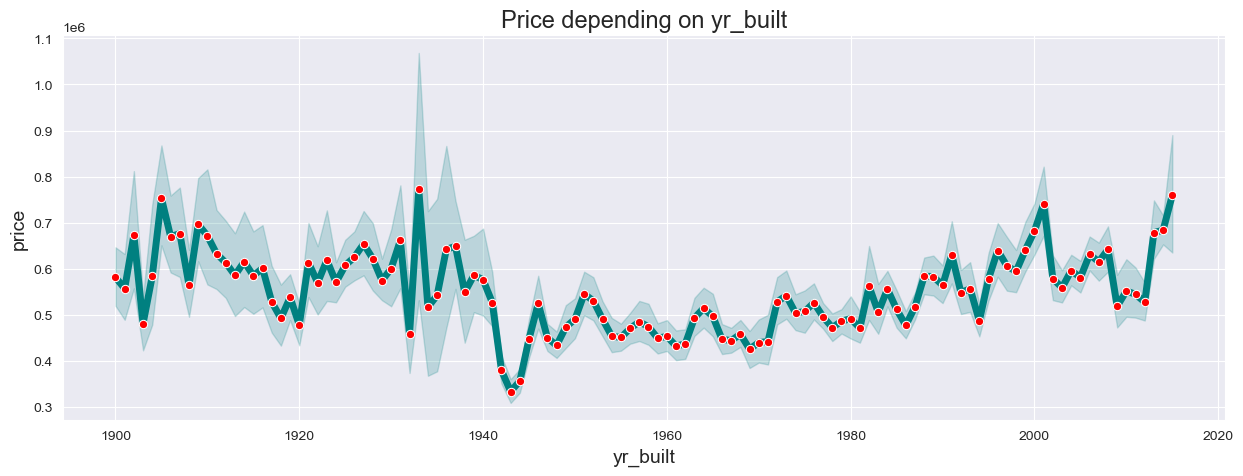

In [38]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='yr_built', y='price', data=df, color='teal', lw=5, marker='o', markerfacecolor='red')
plt.title('Price depending on yr_built', fontsize=17)
plt.xlabel('yr_built', fontsize=14)
plt.ylabel('price', fontsize=14)

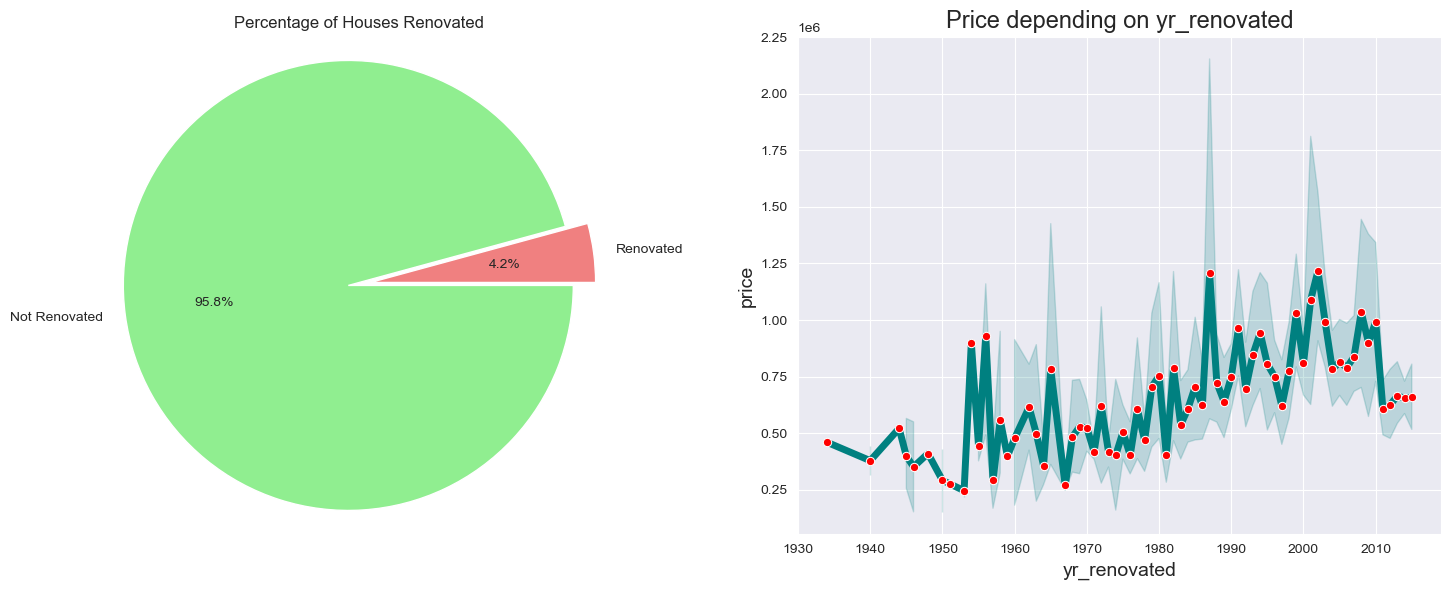

In [39]:
# Count the number of houses that have been renovated (non-zero 'yr_renovated').
renovated_count = len(df[df['yr_renovated'] != 0])

# Calculate the total number of houses.
total_houses = len(df)

# Calculate the percentage of houses that have been renovated.
percentage_renovated = (renovated_count / total_houses) * 100

# Create a pie chart.
labels = ['Renovated', 'Not Renovated']
sizes = [percentage_renovated, 100 - percentage_renovated]
explode = (0.1, 0)  

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0, explode=explode, colors=['lightcoral', 'lightgreen'])
plt.title('Percentage of Houses Renovated')
plt.axis('equal')

# Create the line plot showing the relationship between price and the year of renovation.
plt.subplot(1, 2, 2)
sns.lineplot(x='yr_renovated', y='price', data=df[df['yr_renovated'] != 0], color='teal', lw=5, marker='o', markerfacecolor='red')
plt.title('Price depending on yr_renovated', fontsize=17)
plt.xlabel('yr_renovated', fontsize=14)
plt.ylabel('price', fontsize=14)

plt.tight_layout()

plt.show()

In [40]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x='sqft_living', y='price', hue='grade', palette='RdYlGn_r')
plt.xlabel('Living Space (sqft)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Scatter Plot of Price vs. Living Space by Grade', fontsize=15)
plt.legend(title='Grade', fontsize=14, title_fontsize=14)
plt.show()

In [41]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x='sqft_living', y='price', hue='bathrooms', palette='RdYlGn_r')
plt.xlabel('Living Space (sqft)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Scatter Plot of Price vs. Living Space by Number of Bathrooms', fontsize=15)
plt.legend(title='Bathrooms', fontsize=14, title_fontsize=14)
plt.show()


In [42]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x='yr_built', y='price', hue=df['yr_renovated'].apply(lambda x: 'Yes' if x > 0 else 'No'))
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Scatter Plot of Price vs. Year Built (Renovated vs. Not Renovated)', fontsize=15)
plt.legend(title='Renovated', fontsize=14, title_fontsize=14)
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:19],df.iloc[:,0],test_size=0.3, random_state=0)

# Converting y_train, y_test back to DataFrame
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((15129, 18), (15129, 1), (6484, 18), (6484, 1))

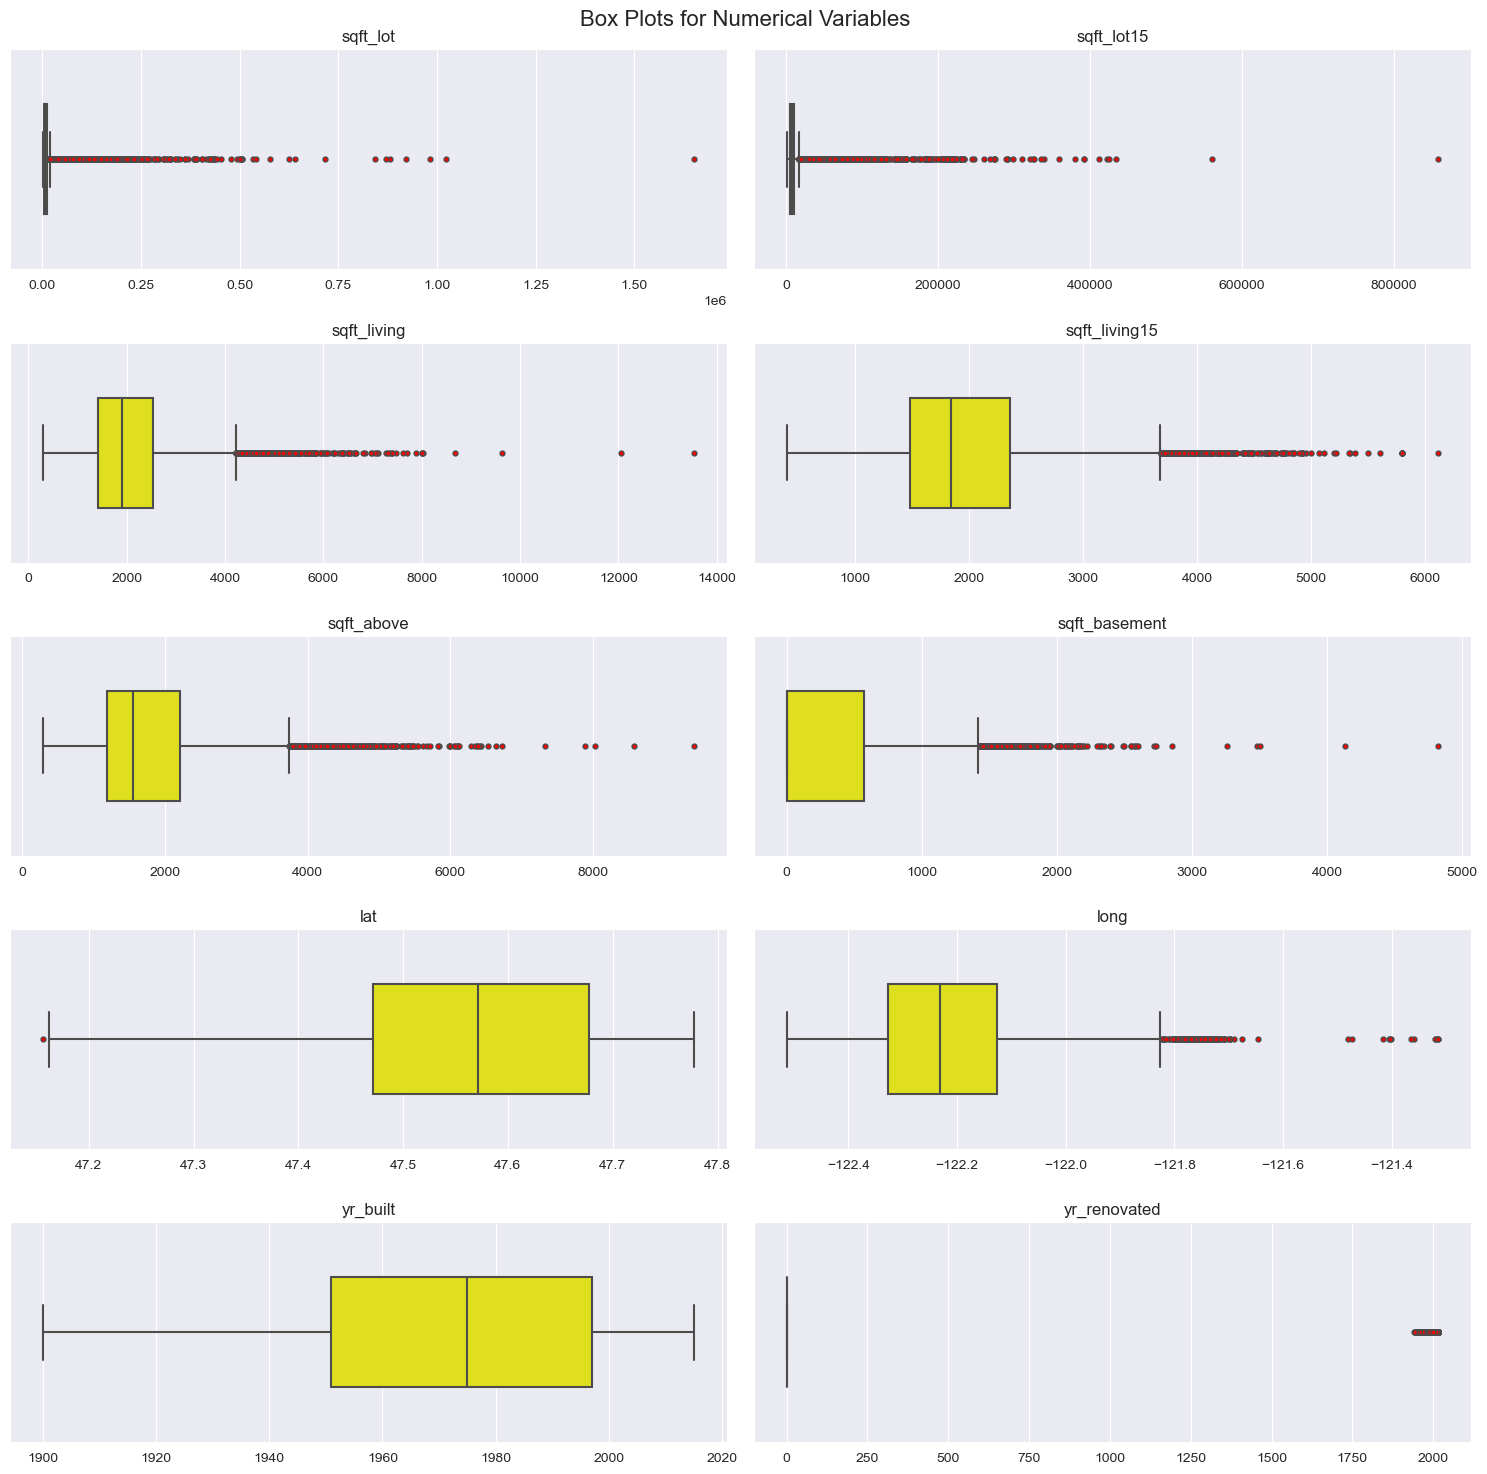

In [44]:
fig,axes = plt.subplots(5,2,figsize=(15,15))

def plot_two(feat,i,j):
    sns.boxplot(x=X_train[feat],color='yellow', width=0.5, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 3.5}, ax=axes[i,j])
    axes[i, j].set_title(feat)
    axes[i, j].set_xlabel('')

for i,feat in enumerate(numeric_columns):
    j = i%2 #0 or 1
    plot_two(feat,i//2,j)
    warnings.filterwarnings("ignore", category=UserWarning)

fig.suptitle('Box Plots for Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

In [45]:
X_train['bedrooms'] = np.where(X_train['bedrooms'] > 11, 11, X_train['bedrooms'])
X_test['bedrooms'] = np.where(X_test['bedrooms'] > 11, 11, X_test['bedrooms'])

In [46]:
def log_transformation(data,column):
    plt.figure(figsize=(22,6))

    plt.subplot(141)
    sns.histplot(data[column],kde=True,color='red');

    plt.subplot(142)
    stats.probplot(data[column], dist="norm", plot=pylab) ;

    plt.subplot(143)
    sns.histplot(np.log(data[column]),color="green",kde=True);

    plt.subplot(144)
    stats.probplot(np.log(data[column]), dist="norm", plot=pylab) ;
    
    data[column] = np.log(data[column])

In [47]:
log_transformation(X_train,'sqft_living')

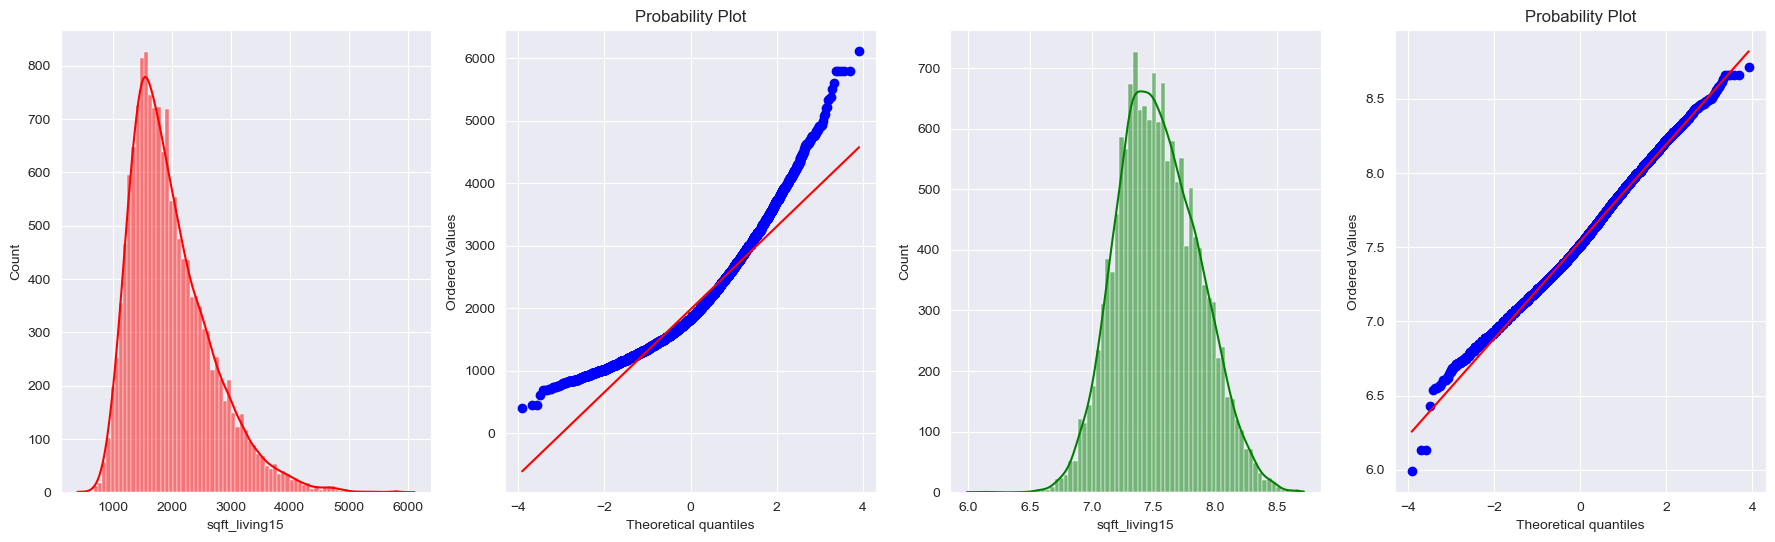

In [48]:
log_transformation(X_train,'sqft_living15')

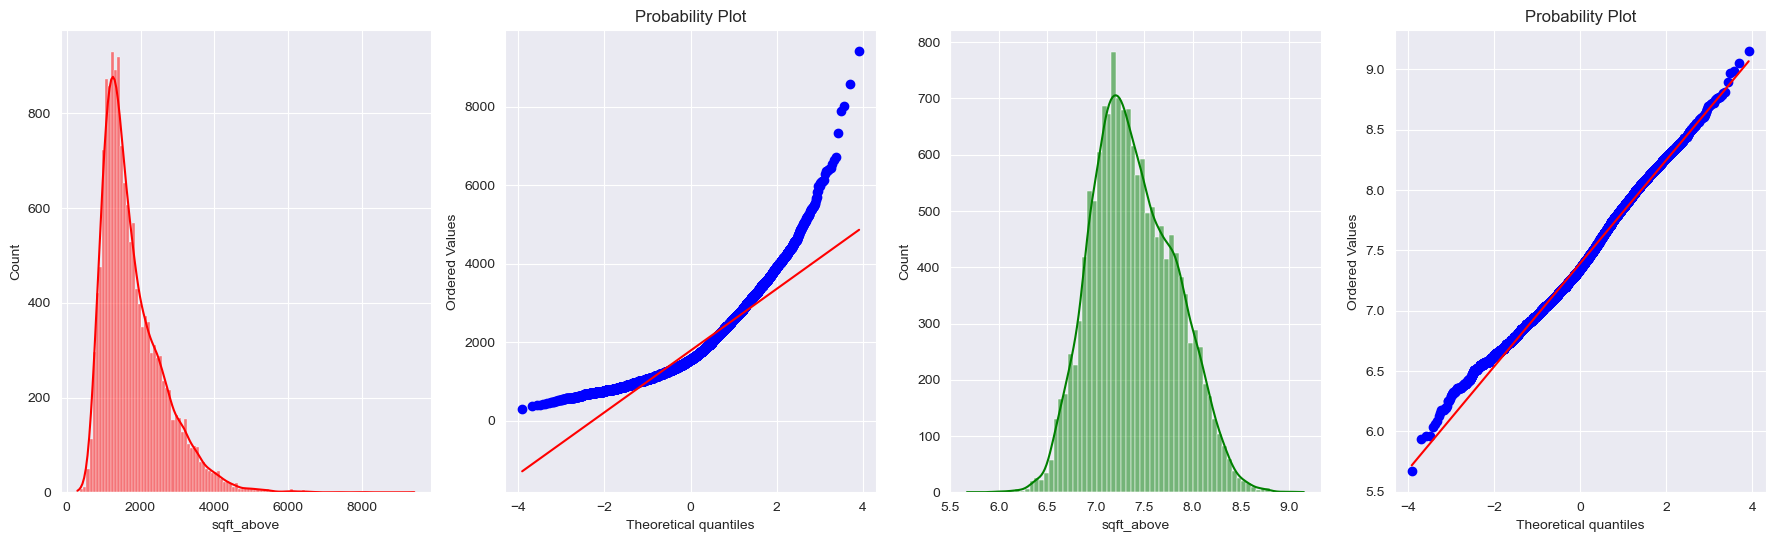

In [49]:
log_transformation(X_train,'sqft_above')

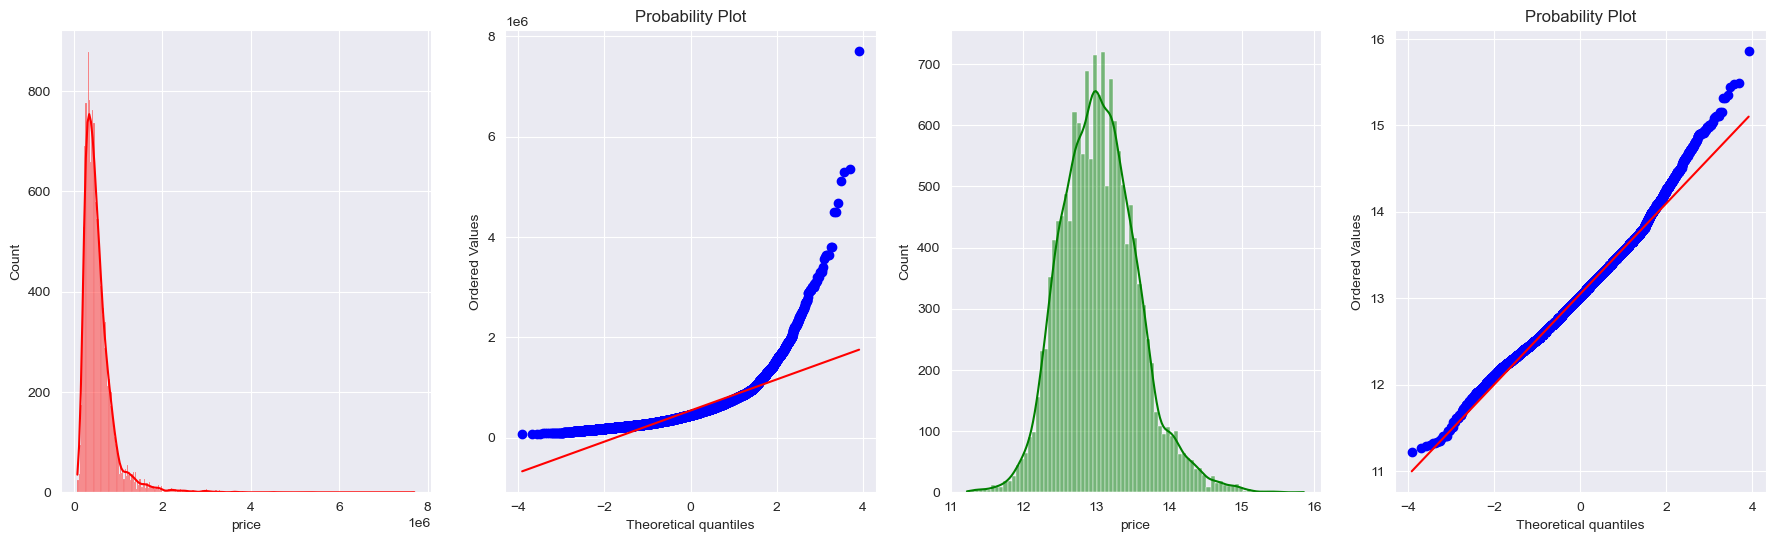

In [50]:
log_transformation(y_train,'price')

In [51]:
X_test['sqft_living'] = np.log(X_test['sqft_living'])
X_test['sqft_living15'] = np.log(X_test['sqft_living15'])
X_test['sqft_above'] = np.log(X_test['sqft_above'])

# Dependent Variabel
y_test['price'] = np.log(y_test['price'])

In [52]:
def box_cox_transformation(data,column):
    plt.figure(figsize=(22,6))

    plt.subplot(141)
    sns.histplot(data[column],kde=True,color='red');

    plt.subplot(142)
    stats.probplot(data[column], dist="norm", plot=pylab) ;
    
    from sklearn.preprocessing import PowerTransformer 
    boxcox = PowerTransformer(method='box-cox') 
    data[column] = boxcox.fit_transform(data[[column]])

    plt.subplot(143)
    sns.histplot(data[column],color="green",kde=True);

    plt.subplot(144)
    stats.probplot(data[column], dist="norm", plot=pylab) ;

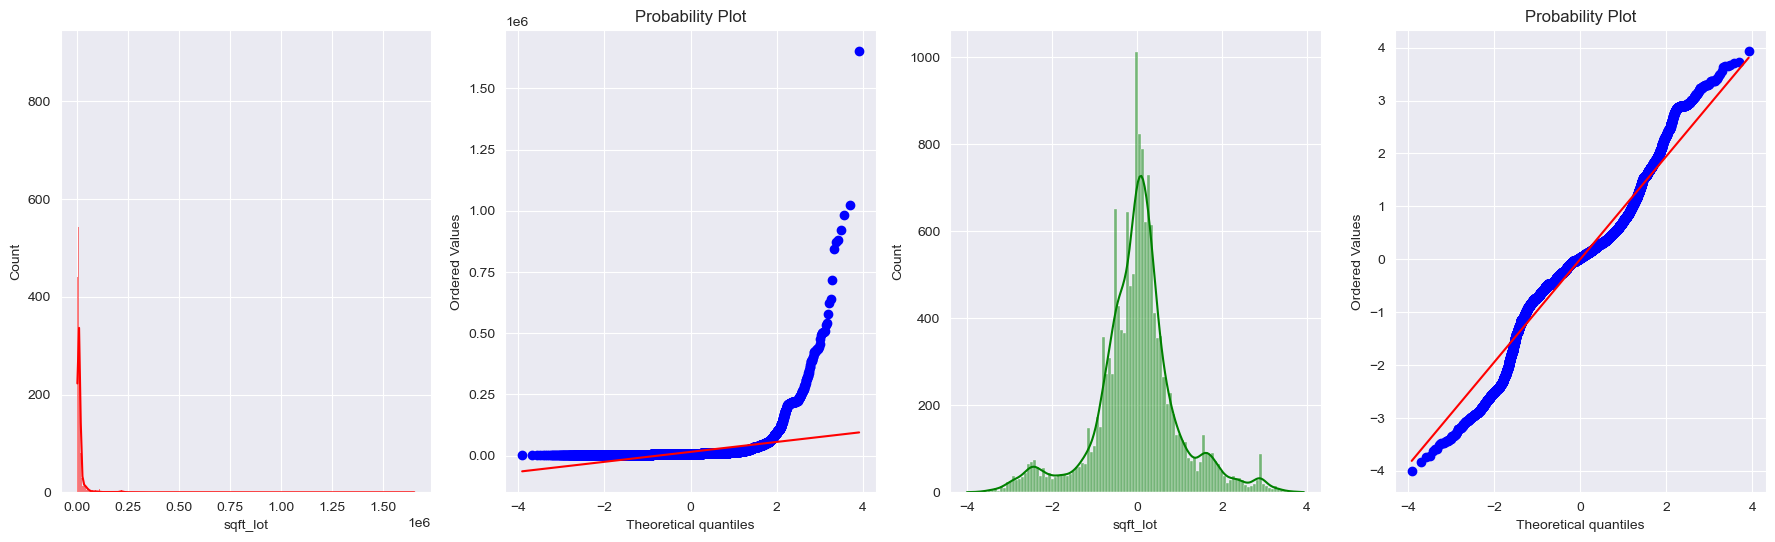

In [53]:
box_cox_transformation(X_train,'sqft_lot')

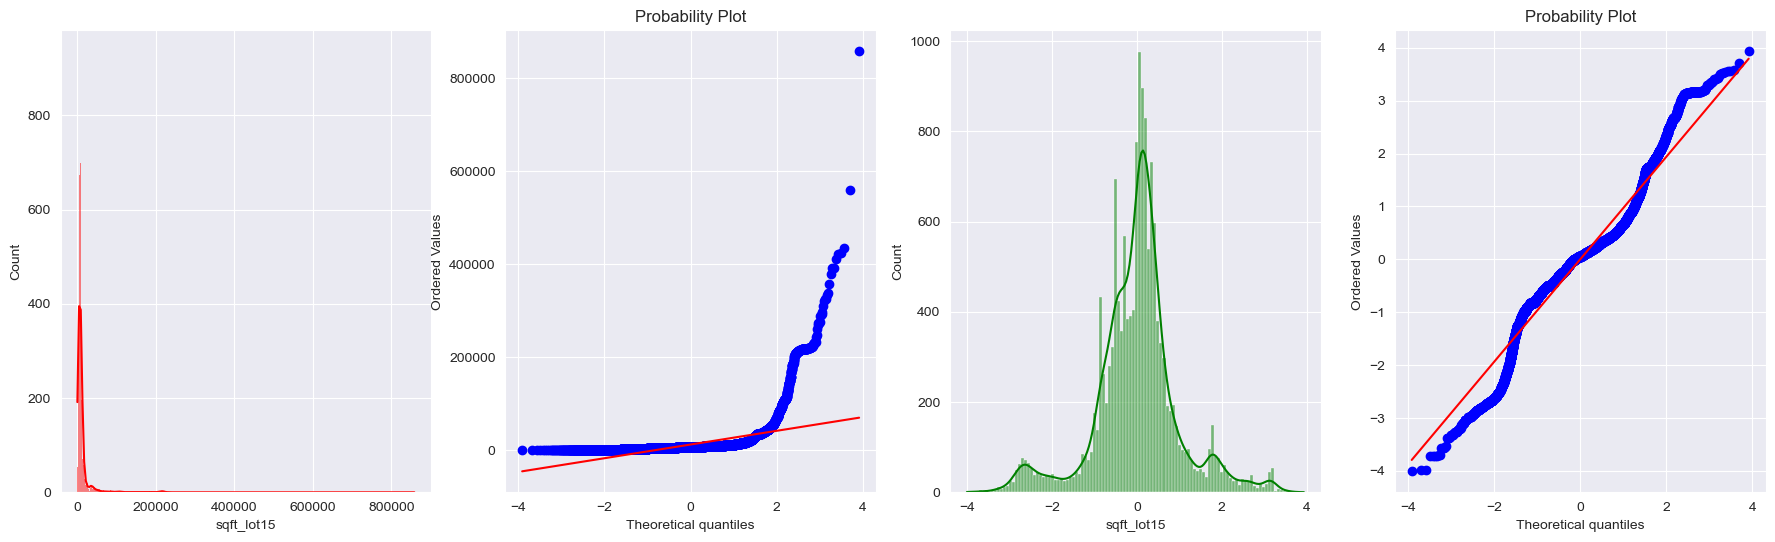

In [54]:
box_cox_transformation(X_train,'sqft_lot15')

In [55]:
from sklearn.preprocessing import PowerTransformer 
boxcox = PowerTransformer(method='box-cox') 

X_test['sqft_lot'] = boxcox.fit_transform(X_test[['sqft_lot']])
X_test['sqft_lot15'] = boxcox.fit_transform(X_test[['sqft_lot15']])

In [56]:
Scaling_Features = ['sqft_basement','lat','long']

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [58]:
X_train[Scaling_Features] = scaler.fit_transform(X_train[Scaling_Features]) # fit the scaler to the train set, and then transform it
X_test[Scaling_Features] = scaler.transform(X_test[Scaling_Features])

In [59]:
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
X_train['yr_built']= est.fit_transform(X_train[['yr_built']])
X_test['yr_built']= est.fit_transform(X_test[['yr_built']])

In [60]:
def custom_binning(year):
    if year == 0:
        return 0
    elif 1934 <= year <= 1950:
        return 1
    elif 1951 <= year <= 1970:
        return 2
    elif 1971 <= year <= 1990:
        return 3
    elif 1991 <= year <= 2010:
        return 4
    else:
        return 5

# Apply the custom binning function to the yr_renovated column
X_train['yr_renovated'] = X_train['yr_renovated'].apply(custom_binning)
X_test['yr_renovated'] = X_test['yr_renovated'].apply(custom_binning)

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X_train['zipcode'] = le.fit_transform(X_train['zipcode'])
X_test['zipcode'] = le.fit_transform(X_test['zipcode'])

In [62]:
def evaluate_linear_regression(model, X_train, y_train, X_test, y_test):
    # Predict on training and testing data
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate R-squared (R2) for training and testing data
    r2_train = r2_score(y_train, train_pred)
    r2_test = r2_score(y_test, test_pred)
    
    # Calculate RMSE (Root Mean Square Error) for training and testing data
    rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))
    
    # Return the evaluation metrics
    print("R-squared (R2) Train:", r2_train)
    print("R-squared (R2) Test:", r2_test)
    print("RMSE Test:", rmse_test)

In [63]:
def plot_coefficients(model):
    # Get coefficients and corresponding feature names
    coefficients = model.coef_.ravel()

    # Feature names (your provided feature names)
    feature_names = X_train.columns

    # Create a DataFrame to store the coefficients and feature names
    coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

    # Calculate absolute coefficients and sort by absolute coefficient value
    coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
    coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=coefficients_df, x='Feature', y='Coefficient', palette='Spectral_r')
    plt.xlabel('Feature')
    plt.ylabel('Coefficient')
    plt.title('Ridge Regression Coefficients (Ranked by Absolute Value)')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

    # Add rank labels to the plot
    for i, rank in enumerate(range(1, len(coefficients_df) + 1)):
        plt.text(i, coefficients_df['Coefficient'].iloc[i], f'{rank}', horizontalalignment='center')
    plt.tight_layout()

    # Display the plot
    plt.show()

In [64]:
from sklearn.metrics import r2_score,mean_squared_error

In [65]:
from sklearn.linear_model import LinearRegression

# Perform Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [66]:
train_pred = linear_model.predict(X_train)
test_pred = linear_model.predict(X_test)

In [67]:
evaluate_linear_regression(linear_model, X_train, y_train, X_test, y_test)

R-squared (R2) Train: 0.77240231542339
R-squared (R2) Test: 0.7770595199876067
RMSE Test: 0.24790031956132194


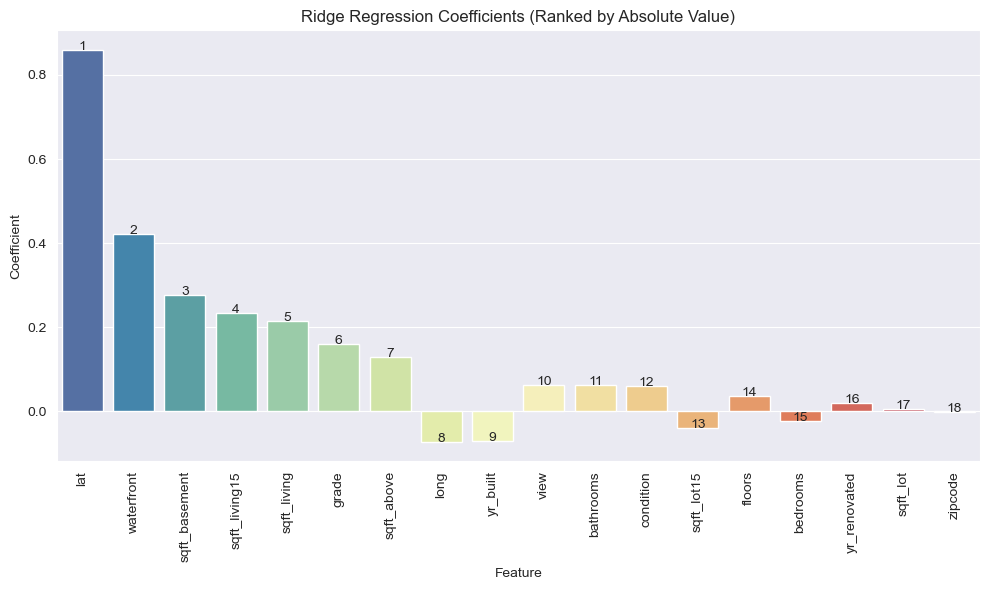

In [68]:
plot_coefficients(linear_model)

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge_model = Ridge()

# Define a range of alpha values to search
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 
                        0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 
                        6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha_ridge = grid_search.best_params_['alpha']
print("Best Parameter (alpha):", best_alpha_ridge)

Best Parameter (alpha): 0.8


In [70]:
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train, y_train)

# Predicttion
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)

In [71]:
evaluate_linear_regression(ridge_model, X_train, y_train, X_test, y_test)

R-squared (R2) Train: 0.7724013577211628
R-squared (R2) Test: 0.7770673259413472
RMSE Test: 0.2478959795792657


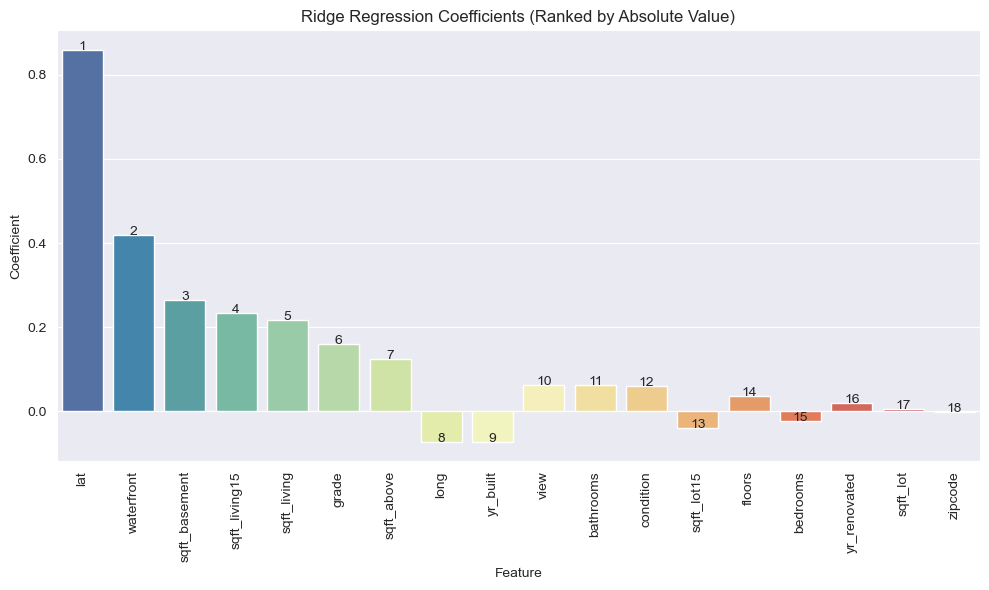

In [72]:
plot_coefficients(ridge_model)

In [73]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

grid_search = GridSearchCV(lasso_model, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha_lasso = grid_search.best_params_['alpha']
print("Best Parameter (alpha):", best_alpha_lasso)

Best Parameter (alpha): 0.001


In [74]:
lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [75]:
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)

In [76]:
evaluate_linear_regression(lasso_model, X_train, y_train, X_test, y_test)

R-squared (R2) Train: 0.7712310788886196
R-squared (R2) Test: 0.7761905465564465
RMSE Test: 0.24838298041655701


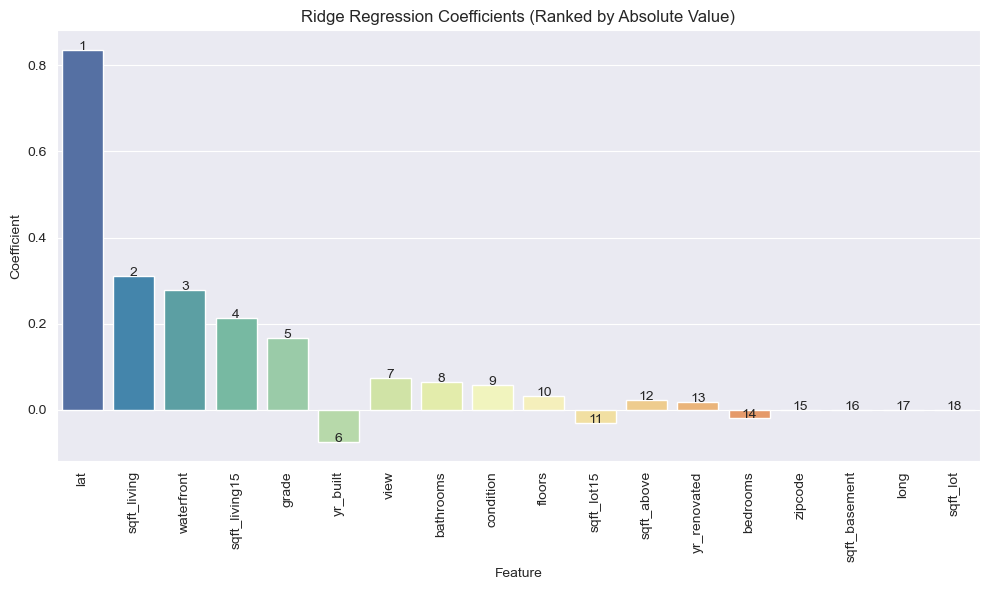

In [77]:
plot_coefficients(lasso_model)

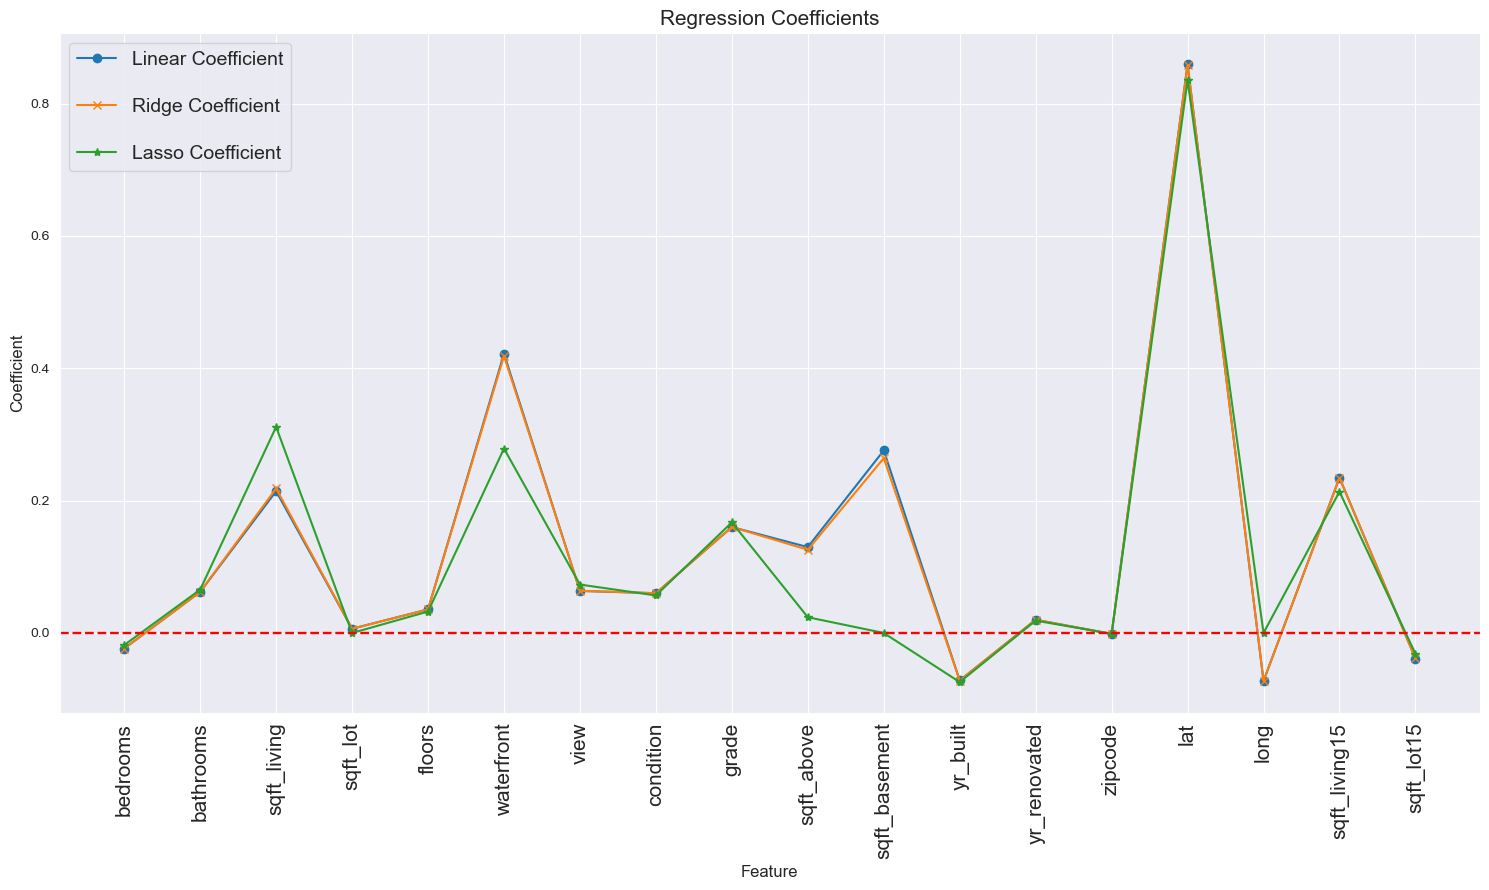

In [78]:
feature_names = X_train.columns # Defining the Feature Names
coefficients_df = pd.DataFrame()

# Create DataFrames for each model's coefficients and feature names
linear_coefficients = pd.DataFrame({'Feature': feature_names, 'Linear Coefficient': linear_model.coef_.ravel()})
ridge_coefficients = pd.DataFrame({'Feature': feature_names, 'Ridge Coefficient': ridge_model.coef_.ravel()})
lasso_coefficients = pd.DataFrame({'Feature': feature_names, 'Lasso Coefficient': lasso_model.coef_.ravel()})

# Merge the DataFrames based on the 'Feature' column
coefficients_df = linear_coefficients.merge(ridge_coefficients, on='Feature').merge(lasso_coefficients, on='Feature')
ticks = range(len(feature_names))  
labels = feature_names  

# Create a line plot for the coefficients
plt.figure(figsize=(15, 9))
plt.plot(ticks, coefficients_df['Linear Coefficient'], marker='o', label='Linear Coefficient')
plt.plot(ticks, coefficients_df['Ridge Coefficient'], marker='x', label='Ridge Coefficient')
plt.plot(ticks, coefficients_df['Lasso Coefficient'], marker='*', label='Lasso Coefficient')
plt.xticks(ticks, labels, rotation=90, fontsize=15)
plt.xlabel('Feature',fontsize=12)
plt.ylabel('Coefficient',fontsize=12)
plt.title('Regression Coefficients',fontsize=15)
plt.tight_layout()
plt.legend(loc='upper left',fontsize=14,labelspacing=1.5)  

# Add a horizontal red line at zero
plt.axhline(0, color='red', linestyle='--', linewidth=1.7)
plt.show()